### 目录
#### 1. 了解数据
##### 1.1 导入训练数据与测试数据
##### 1.2 可视化数据
#### 2. 数据清洗
##### 2.1 缺失值处理
##### 2.2 异常值处理
#### 3. 特征工程
##### 3.1 主成分分析 （PCA）
##### 3.2 线性判别分析法（LDA）
#### 4. 划分训练集/验证集
##### 4.1 归一化
##### 4.2 划分训练集/验证集
#### 5. 定义评估方法
#### 6. 构建神经网络
##### 6.1 训练模型
#### 7. 利用测试集评估学习结果

---

#### 1. 可视化数据
##### 1.1 导入训练数据与测试数据

+ **data** 保存 **train.csv**
+ **features** 保存 **train.csv** 的特征
+ **prices** 保存 **train.csv** 的目标值
---
+ **test_features** 保存 **test.csv**，即保存 **test.csv** 的特征

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Seperate the features and target value from the train.csv
# features 十三维的特征
# 目标值是房价： prices
data = pd.read_csv('../Row_Data/train.csv')
prices = data['medv']
features = data.drop('medv', axis = 1)
test_features = pd.read_csv('../Row_Data/test.csv')

In [2]:
#目标：计算房价的最小值
minimum_price = min(prices)

#目标：计算房价的最大值
maximum_price = max(prices)

#目标：计算房价的平均值
mean_price = np.mean(prices)

#目标：计算房价的中值
median_price = np.median(prices)

#目标：计算房价的标准差
std_price = np.std(prices)

#目标：输出计算的结果
print("Statistics for Boston housing dataset:")
print("Minimum price: \t$", minimum_price)
print("Maximum price: \t$", maximum_price)
print("Mean price: \t$", mean_price)
print("Median price: \t$", median_price)
print("Standard deviation of prices: \t$", std_price)

Statistics for Boston housing dataset:
Minimum price: 	$ 5.0
Maximum price: 	$ 50.0
Mean price: 	$ 22.76876876876877
Median price: 	$ 21.6
Standard deviation of prices: 	$ 9.159683694919632


In [3]:
features.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000


##### 1.2 先随便挑选几个特征来可视化 

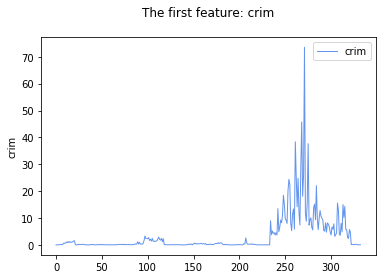

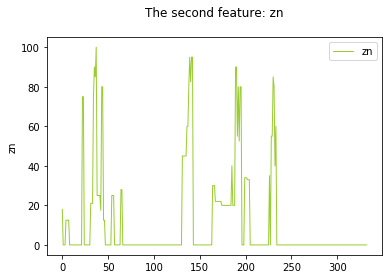

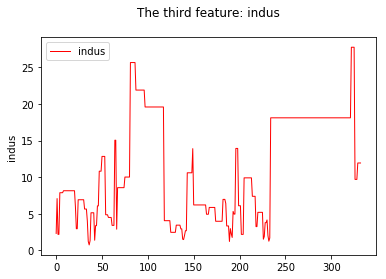

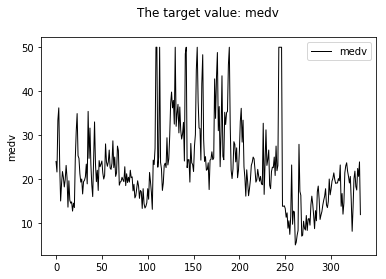

In [4]:
# 画出 features.crim 图像
plt.figure()
plt.plot(features.crim, color="cornflowerblue", label="crim", linewidth=1)
plt.ylabel("crim")
plt.title("The first feature: crim\n")
plt.legend()
plt.show()

# 画出 features.zn 图像
plt.figure()
plt.plot(features.zn, color="yellowgreen", label="zn", linewidth=1)
plt.ylabel("zn")
plt.title("The second feature: zn\n")
plt.legend()
plt.show()

# 画出 features.indus 图像
plt.figure()
plt.plot(features.indus, color="red", label="indus", linewidth=1)
plt.ylabel("indus")
plt.title("The third feature: indus\n")
plt.legend()
plt.show()

# 画出 values 图像
plt.figure()
plt.plot(prices, color="black", label="medv", linewidth=1)
plt.ylabel("medv")
plt.title("The target value: medv\n")
plt.legend()
plt.show()

#### 2. 数据清洗
##### 2.1 缺失值处理

In [5]:
# 缺失值处理
count = 0
for i in features:
    count += features[i].isnull().sum()
    print(features[i].isnull().sum())
print("空值个数为：", count)
if(count == 0):
    print("无缺失值")
data.info()

0
0
0
0
0
0
0
0
0
0
0
0
0
0
空值个数为： 0
无缺失值
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


##### 2.2 异常值处理

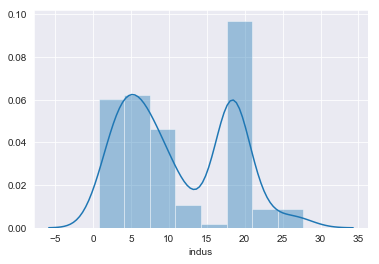

In [6]:
# 异常值处理
import seaborn as sns
sns.set_style('darkgrid')
sns.distplot(features.indus)
#sns.distplot(features.zn)
#sns.distplot(features.black)
#sns.distplot(features.crim)

#### 3. 特征工程
###### 在进行特征工程的时候，我们不仅需要对训练数据进行处理，还需要同时将测试数据同训练数据一起处理，使得二者具有相同的数据类型和数据分布。
##### 3.1 主成分分析 （PCA）

In [7]:
# 用 PCA 从 13 维度降至 10 维度 
# 先去掉ID
features = features.drop('ID', axis = 1)
features
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
newfeatures = pca.fit_transform(features)
# 查看前 3 行
newfeatures[:3]

array([[-119.75386175,   -7.83917519,   -3.16445772,    6.19441862,
          -4.07667334,    5.37050041,   -0.74070188,    5.42597745,
           1.75017944,   -0.27564841],
       [-169.50276671,    5.83441619,  -30.51712067,    1.48637459,
          -0.76489749,    3.13517314,   -0.23434761,    1.03205475,
          -0.50255232,    1.39595369],
       [-191.19936724,   12.90321916,   -5.63890319,  -18.76641735,
          -1.22476344,    7.09343101,   -0.37123921,    1.00983758,
          -1.19008723,    1.03688806]])

##### 所以也要对测试集进行同样的特征提取

In [8]:
# 用 PCA 从 13 维度降至 10 维度 
# 先去掉ID
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
test_newfeatures = pca.fit_transform(test_features)
# 查看前 3 行
test_newfeatures[:3]

array([[-2.85930687e+02, -1.10470514e+02, -1.20487981e+01,
        -1.74238056e+00,  1.26762752e+01,  2.22742100e+00,
        -6.80047276e+00, -3.87880878e-01, -5.19409555e-01,
         2.21114340e-01],
       [-2.99800734e+02, -9.89771125e+01, -2.54333106e+00,
        -3.11094455e+00,  1.36107221e+01,  3.40242673e+00,
        -5.58048307e+00, -5.25331323e+00, -1.55450473e-02,
         8.66134949e-01],
       [-2.30243717e+02, -1.36657567e+02, -4.98453689e+01,
        -9.62168300e+00, -1.90663105e+01, -1.01370445e+00,
         3.94229280e+00, -3.59280627e+00, -4.76769364e-02,
        -2.23420842e+00]])

##### 3.2 线性判别分析法（LDA）

In [9]:
# features.shape
# prices.shape
# 载入 LDA 模型，设置 n_components = 10

#### 4. 划分训练集/验证集（把测试集2：8划分成验证集和训练集）
####  先归一化数据， 归一化之后再划分
##### 4.1 归一化

#### 因为各个 feature 的取值范围区别较大，所以对数据进行标准化.
#### 标准化 **train.csv** 和 **test.csv** 的每个 feature                               
#### 标准化方法：
$$\hat x = {\frac{x - \overline x}{s}}$$
+ $\overline x$: 平均数
+ $s$: 标准差

In [10]:
# 自定义一个最小最大规范化的函数
def minmax_normalization(data):
    xs_max = np.max(data, axis=0)
    xs_min = np.min(data, axis=0)
    xs = (1 - 0) * (data - xs_min) / (xs_max - xs_min) + 0
    return xs

In [11]:
# 将 data 传入上面的规范化函数 
# 规范化得到的数据存放在 m_n_data 中
m_n_data = minmax_normalization(data);
m_n_data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.000000,0.000000,0.180,0.058148,0.0,0.314815,0.583656,0.629787,0.308996,0.000000,0.206501,0.313953,1.000000,0.089680,0.422222
1,0.001980,0.000285,0.000,0.234444,0.0,0.172840,0.553834,0.775532,0.400545,0.043478,0.103250,0.604651,1.000000,0.204470,0.368889
2,0.005941,0.000354,0.000,0.053333,0.0,0.150206,0.665569,0.423404,0.514848,0.086957,0.065010,0.709302,0.994230,0.033389,0.631111
3,0.007921,0.000853,0.000,0.053333,0.0,0.150206,0.694423,0.512766,0.514848,0.086957,0.065010,0.709302,1.000000,0.099338,0.693333
4,0.011881,0.001115,0.125,0.264074,0.0,0.286008,0.474632,0.644681,0.462482,0.173913,0.235182,0.302326,0.996695,0.295254,0.397778


---
#### **m_n_features** 保存 **features** 归一化之后的数据
#### **prices** 不需要归一化

In [12]:
m_n_features = m_n_data.drop('medv', axis = 1)

##### 4.2 划分训练集/验证集
#### 分割比例为：80%的数据用于训练，20%用于测试 test_size = 0.2
#### 将数据集分成训练集和验证集的好处：既可以用于训练又可以用于测试，而且不会相互干扰，而且可以对训练模型进行有效的验证。

In [21]:
# Split the dataset as traing set and testing set
m_n_features = m_n_features.drop('ID', axis = 1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(m_n_features, prices, test_size = 0.2, random_state = 1) # random_state=1:不会随机划分
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
298,0.092412,0.0,0.642963,0.0,0.674897,0.487994,0.834043,0.165739,1.000000,0.913958,0.883721,1.000000,0.357892
162,0.004408,0.0,0.202222,0.0,0.251029,0.488962,0.590426,0.263269,0.304348,0.227533,0.558140,0.948780,0.252483
175,0.007178,0.2,0.119630,0.0,0.539095,0.766654,0.887234,0.105441,0.173913,0.145315,0.046512,0.978317,0.152594
161,0.006006,0.0,0.202222,1.0,0.251029,0.612897,0.643617,0.263269,0.304348,0.227533,0.558140,0.906711,0.174393
14,0.011502,0.0,0.274074,0.0,0.314815,0.465531,0.885106,0.300886,0.130435,0.227533,0.976744,0.988892,0.333885


#### **test.csv** PAC 之后也要相应地归一化

In [20]:
# 将 test_features 传入上面的规范化函数 
# 先去掉 test_features 的 ID 列
test_features = test_features.drop('ID', axis = 1)
# 规范化得到的数据存放在 m_n_newfeatures 中
m_n_newfeature = minmax_normalization(test_features);
m_n_newfeature.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.000152,0.000000,0.242302,0.0,0.160752,0.656398,0.599382,0.346078,0.043478,0.104962,0.553191,0.989737,0.065023
1,0.000180,0.000000,0.063050,0.0,0.137787,0.493753,0.574665,0.446102,0.086957,0.066794,0.648936,0.992990,0.101387
2,0.001470,0.131579,0.271628,0.0,0.275574,0.438173,0.959835,0.435899,0.173913,0.236641,0.276596,1.000000,0.530971
3,0.002219,0.131579,0.271628,0.0,0.275574,0.321629,1.000000,0.447919,0.173913,0.236641,0.276596,0.974104,0.863174
4,0.001756,0.131579,0.271628,0.0,0.275574,0.401982,0.854789,0.494501,0.173913,0.236641,0.276596,0.974305,0.467797


#### 5. 定义评估方法

#### $MSE$ (均方误差 Mean Squared Error): $$MSE = {\frac{1} {n}}{\sum_{k=1}^n (y_i - \hat y_i)^2}$$

#### $RMSE$ (均方根误差 Root Mean Squared Error): $$RMSE = \sqrt{{\frac{1} {n}}{\sum_{k=1}^n (y_i - \hat y_i)^2}}$$
+ 模型越好：$RMSE \to 0$

In [15]:
# 自定义一个返回最终残差和的函数
from sklearn.metrics import r2_score
def performance_metric(y_true,y_predict):
    '''计算实际值与预测值的R2分数'''
    score = r2_score(y_true,y_predict)
    return score

#### 6. 构建神经网络
##### 6.1 训练模型

In [16]:
# DNN 




#### 7. 利用测试集评估学习结果

In [17]:
# Evalution


